# Factors affecting Student's Test Score

Answered Q1 from data source ([Data Card - Acknowledgment]

## 1. Problem Definition 

Here's some example research questions from the data source.  

**Q1. How effective is the test preparation course?**  
What we assume here is: "Test preparation course actually helped students get better score".  
How are we going to prove this hypothesis through the data?

**Q2. Which major factors contribute to test outcomes?**  
If preparation course was not the key to the test scores, we might need to find other factors. Most are not changable, but showing the result (like 'THIS affected on test score') can justify a need to re-design the test as fair as possible to anyone.

**Q3. What would be the best way to improve student scores on each test?**  
We should not end up describing the data. Drawing out actionable insights is the key to data analysis. Insights can be drawn from the answers we've found in Q2 or even in Q1

Among the three, I'll answer **Q1** today.

## 2. Environment Settings

### Kaggle Default

In [164]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/how-the-students-test-scores-are-affected/stud_perf_exam.csv


### Dataset

In [165]:
exam = pd.read_csv('/kaggle/input/how-the-students-test-scores-are-affected/stud_perf_exam.csv')
exam.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Vsualization modules

In [166]:
# Modules
import seaborn as sns
import matplotlib.pyplot as plt

# Listed Columns for a quick Copy & Paste
exam.columns


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

## 3. Data Exploration

### Q1-1. How effective is the test preparation course?

First, see the overall distribution.

mean                                 median  \
                        math score reading score writing score math score   
test preparation course                                                     
completed                69.695531     73.893855     74.418994         69   
none                     64.077882     66.534268     64.504673         64   

                                                     
                        reading score writing score  
test preparation course                              
completed                          75            76  
none                               67            65

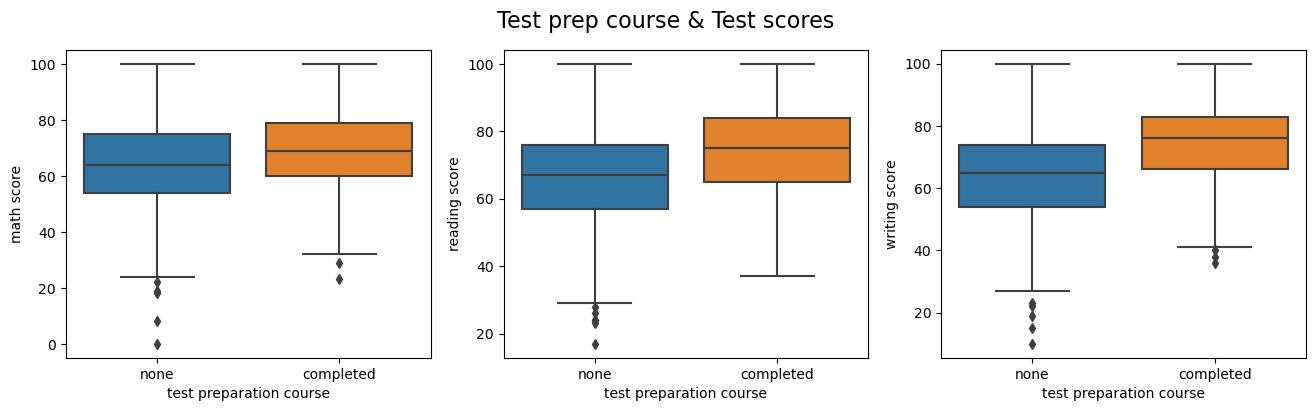

In [167]:
fig, axes = plt.subplots(1,3,figsize=(16,4))
axes = axes.ravel()
fig.suptitle('Test prep course & Test scores', fontsize=16)


for col,ax in zip(['math score', 'reading score', 'writing score'],axes):
    sns.boxplot(data=exam, x='test preparation course', y=col, ax=ax)

prep_effect = pd.pivot_table(data=exam, index='test preparation course', values=['math score','reading score', 'writing score'], aggfunc=['mean', np.median])
prep_effect


#### 'Completed' students got 5~10 points higher than 'none' students in every subject.

Orange boxes are distributed on higher positions than blue boxes.  
We can say 'Completed' students got better score than 'none' group students.

#### But, we want to know more.
Boxes cover the score range from 60 to 80. But what about others?  
How many students got higher points with or without the course completion?  
We're going to see and compare the portions of student in some score range.


In [168]:
print(exam['test preparation course'].value_counts())
print('\n')

print('Students earned more than 80')
print('==='*10)
print(f"Math\n{exam[exam['math score'] >= 80]['test preparation course'].value_counts()}")
print('---'*10)
print(f"Reading\n{exam[exam['reading score'] >= 80]['test preparation course'].value_counts()}")
print('---'*10)
print(f"Writing\n{exam[exam['writing score'] >= 80]['test preparation course'].value_counts()}")

none         642
completed    358
Name: test preparation course, dtype: int64


Students earned more than 80
Math
none         105
completed     88
Name: test preparation course, dtype: int64
------------------------------
Reading
completed    130
none         119
Name: test preparation course, dtype: int64
------------------------------
Writing
completed    132
none         103
Name: test preparation course, dtype: int64


#### Here's the point.  
132 students earned <u>more than 80 points</u> in writing out of 358 students with course completion.  
Meantime, 103 students recorded the same range out of 642 students without the course.  

We must compare between **132/358(around 36%) and 103/642(around 17%)**, not *132 and 103* themselves.

In [169]:
prep_none = exam[exam['test preparation course']=='none']
prep_completed = exam[exam['test preparation course']=='completed']


In [170]:
# Getting percentage of each group
def get_portion(dataframe, subject):
    result = []
    
    for score in range(0, 100, 10):
        condition_1 = dataframe[subject] > score
        condition_2 = dataframe[subject]<= score+10

        num_students = len(dataframe[(condition_1) & (condition_2)])
        ratio_group = round(num_students / len(dataframe) * 100, 2)

        result.append(ratio_group)
    
    # Returns a list of ratios
    return result


In [171]:
# Define index
index = pd.Index([f"{start+1}~{start+10}" if start > 0 else "0~10" for start in range(0, 100, 10)], name='Score Range')

# Define columns
columns = pd.MultiIndex.from_product([['Math', 'Reading', 'Writing'], ['None', 'Completed']], names=['Subject', 'Prep course'])

# Dict for matching columns names between two dataframes
subject_dict = {'Math':'math score', 'Reading':'reading score', 'Writing':'writing score'}

# Create empty dataframe
portion_by_prep = pd.DataFrame(index=index, columns=columns)

# Inserting ratio into the dataframe
for subject, column in subject_dict.items():
    portion_by_prep[(subject, 'None')] = get_portion(prep_none, column)
    portion_by_prep[(subject, 'Completed')] = get_portion(prep_completed, column)

portion_by_prep


Subject       Math           Reading           Writing          
Prep course   None Completed    None Completed    None Completed
Score Range                                                     
0~10          0.16      0.00    0.00      0.00    0.16      0.00
11~20         0.31      0.00    0.16      0.00    0.31      0.00
21~30         1.56      0.56    1.09      0.00    1.09      0.00
31~40         4.21      1.96    2.65      0.56    3.43      0.84
41~50        11.84      6.70    8.41      4.47   11.53      4.19
51~60        20.09     16.76   21.03     12.01   21.34     11.17
61~70        26.95     27.09   25.70     20.39   26.32     20.67
71~80        20.40     23.46   23.83     27.65   21.65     30.45
81~90        11.37     14.80   12.77     25.42   10.12     20.95
91~100        2.96      8.66    4.36      9.50    4.05     11.73

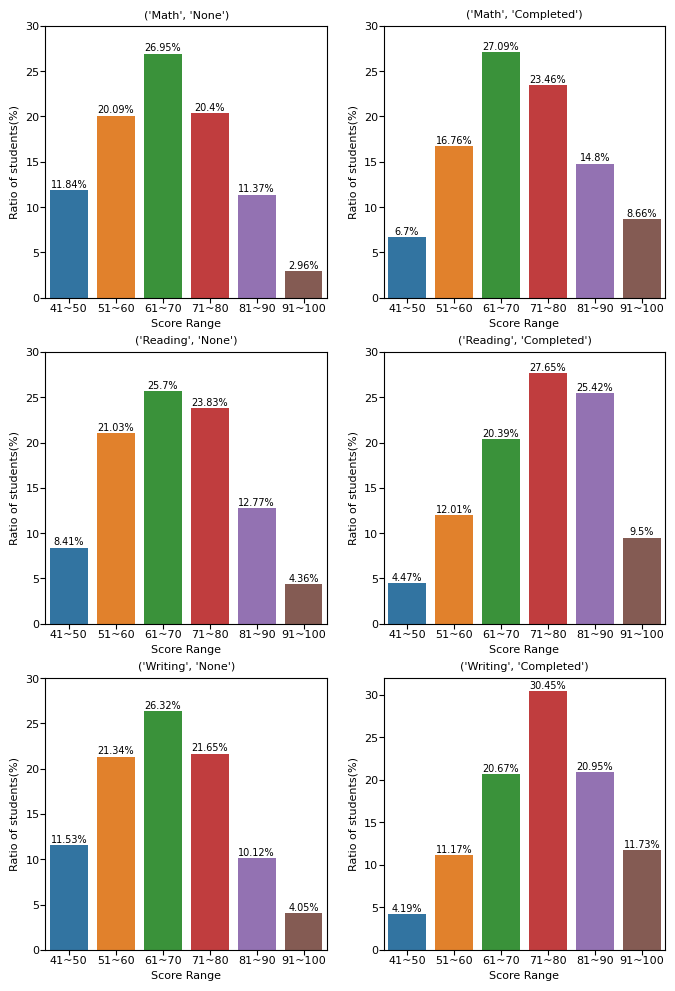

In [172]:
# Columns and Subplots
cols = portion_by_prep.columns
fig, axes = plt.subplots(3, 2, figsize=(8,12))

# Visualize to see distribution of ratios
for idx_out, ax_out in enumerate(axes):
    for idx_in, ax in enumerate(ax_out):
        sns.barplot(data=portion_by_prep[4:], x=index[4:], y=cols[(idx_out*2+idx_in*1)], ax=ax)
        
        ax.set_title(cols[(idx_out*2+idx_in*1)], fontsize=8)
        ax.set_xlabel('Score Range', fontsize=8)
        ax.set_ylabel('Ratio of students(%)', fontsize=8)
        ax.set_yticks([5*i for i in range(7)])
        ax.tick_params(axis='both', labelsize=8, pad=0.5)
        
        # Display each value
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width()/2., height+0.3, f"{height}%", ha = 'center', size = 7)


Portion of students (above 70 pts) were higher in 'completed' group.  
Portion of students (below 70 pts) were higher in 'none' group despite the small difference in math.  
Now we can say with confidence **prep course helped students getting more than 70 pts**.  


### Q1. Conclusion: Yes, Effective!

Though we need more data measuring the score before and after the test, in a same or at least similar group, to say *prep course raised students' score*, it is now safe to say **course completion has considerable correlation with high scores.**

### Actionable Insight

Only with this short exploration we can plan a simple promotion.  

#### Encouraging Test Preparation Course  

[Situation]  
I am a new researcher of education center in ABC school.  
The center has a goal this semester: **To encourage students taking test prep course**   
What should I do to make the promotion most effective?  

[Action]  
**Inform the team** of current participation rate (35.8%) and **get a specific goal** (ex: 50%)  
Design promotion materials **emphasizing achievments in higher score range.**.
If you need to focus on only one subject, **do it on writing**.  
It showed the biggest difference between 'completed' and 'none' group.  



___

### Visualization Practice

In [173]:
print(exam.info())
print('\n')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [192]:
columns = exam.columns[:4].to_numpy()
columns = columns.reshape(2,2)

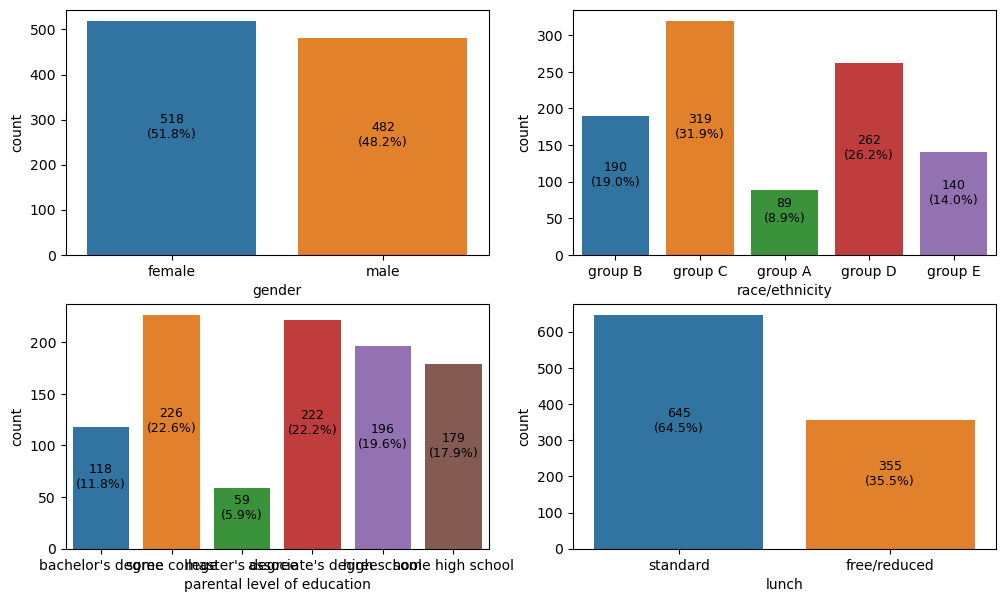

In [205]:
# Countplots 
fig, axes = plt.subplots(2,2, figsize=(12,7))

num = 1
for ax_out, col_out in zip(axes, columns):
    for ax, col in zip(ax_out, col_out):
        sns.countplot(data=exam, x=col, ax=ax)
        
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width()/2., height/2, f"{int(height)}\n({round(height/len(exam)*100,2)}%)", ha = 'center', size = 9)


<AxesSubplot:xlabel='reading score', ylabel='writing score'>

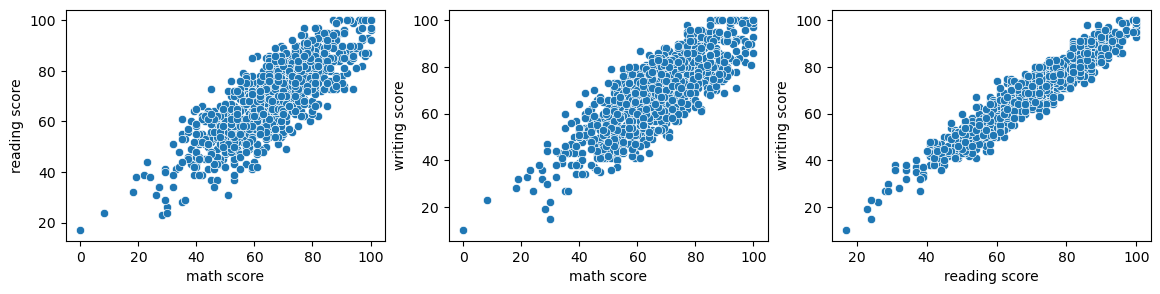

In [175]:
fig, axes = plt.subplots(1,3, figsize=(14,3))

sns.scatterplot(data=exam, x='math score', y='reading score', ax=axes[0])
sns.scatterplot(data=exam, x='math score', y='writing score', ax=axes[1])
sns.scatterplot(data=exam, x='reading score', y='writing score', ax=axes[2])

Scatterplots to find out students who are extremely good at something and bad at others, but outliers doesn't seem to exist.  
So I'll consider that average score tendency is almost as same as tendency of each subject.

In [183]:
exam['avg_score'] = round((exam['math score'] + exam['reading score'] + exam['writing score']) / 3, 2)

cols_score = ['avg_score', 'math score', 'reading score', 'writing score']
cols_score

['avg_score', 'math score', 'reading score', 'writing score']

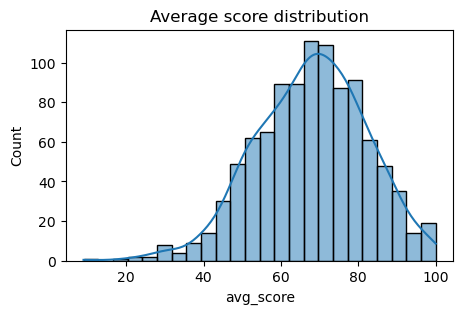

In [176]:
plt.figure(figsize=(5,3))
sns.histplot(exam['avg_score'], kde=True)
plt.title('Average score distribution')
plt.show()


<AxesSubplot:xlabel='avg_score', ylabel='lunch'>

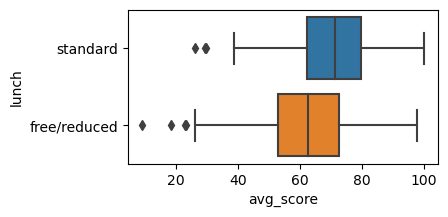

In [177]:
plt.figure(figsize=(4,2))
sns.boxplot(data=exam, y='lunch', x='avg_score')


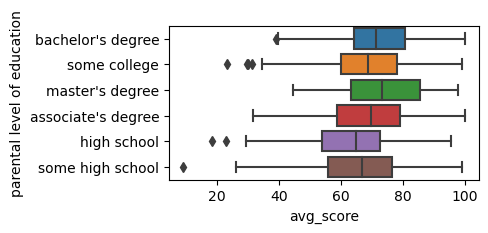

In [178]:
plt.figure(figsize=(4,2))
sns.boxplot(data=exam, y='parental level of education', x='avg_score')
plt.show()


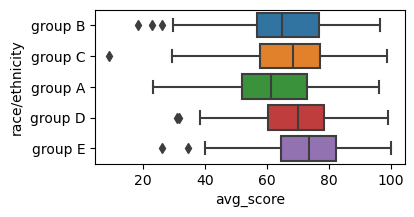

In [180]:
plt.figure(figsize=(4,2))
sns.boxplot(data=exam, y='race/ethnicity', x='avg_score')
plt.show()


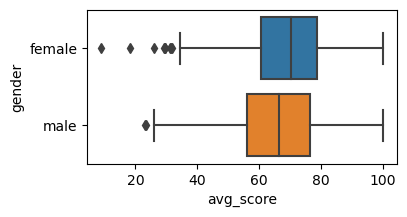

In [207]:
plt.figure(figsize=(4,2))
sns.boxplot(data=exam, x='avg_score', y='gender')
plt.show()
